---
# **Application of Fractal Geometry in Generating Variations of East Kalimantan Batik Motifs Based on Julia Set**

---
# *Razi Rachman Widyadhana - 13523004*

---
# ~ Introduction ~

## 🔬Overview
> Indonesia is well known for its diverse backgrounds, cultures, and heritage. One of Indonesia’s intangible cultural heritages is Batik, officially recognized as UNESCO’s Intangible Cultural Heritage of Humanity on October 2, 2009. Batik is a decorative pattern made by writing or applying wax to fabric. Etymologically, the word batik comes from the Javanese language, derived from the word amba, which means 'to draw,' and tik, which means 'dot' (a verb meaning to make dots). It later developed into the term Batik [1]. Indonesia features numerous Batik motifs characteristic of various regions, including East Kalimantan, representing the province's rich cultural identity.

> East Kalimantan is a province in Indonesia known for its rich natural resources and cultural diversity. The region is home to various ethnicities, such as the Dayak and Kutai, whose traditions and artistic expressions have significantly influenced local craftsmanship, particularly in Batik. 

> The creation of Batik motifs has advanced significantly, originating from traditional handcrafting methods and expanding to applying mathematical principles, particularly fractal geometry. Fractal geometry is a branch of mathematics that studies the properties and behaviors of various fractals. Unlike most conventional mathematical forms, fractals generally have irregular shapes that do not follow linearity.

> Therefore, this paper reveals how Python programming and Photo Editor generate creative variations of East Kalimantan Batik motifs. This paper introduces Julia set as the fractal geometry implementation for developing the Batik motifs.

--- 
# ~ Initialization ~

In [1]:
COLOR_PALETTES = {
    'WHITE': [
        (0, 0, 0, 0),          # Start transparent
        (1, 1, 1, 0.7),       
        (1, 1, 1, 1)           # Solid pure white
    ],
    'CREAM': [
        (1, 0.95, 0.8, 0),
        (1, 0.95, 0.8, 1),   # Warm, soft cream color
        (1, 0.95, 0.8, 1)
    ],
    'YELLOW': [
        (1, 1, 0, 0),
        (1, 1, 0, 0.7),        # Bright, pure yellow
        (1, 1, 0, 1)
    ],
    'GOLD': [
        (1, 0.84, 0, 0),
        (1, 0.84, 0, 0.7),     # Rich golden hue
        (1, 0.84, 0, 1)
    ],
    'RED': [
        (1, 0, 0, 0),
        (1, 0, 0, 0.7),        # Vibrant pure red
        (1, 0, 0, 1)
    ],
    'GREEN': [
        (0, 0.8, 0.2, 0),
        (0, 0.8, 0.2, 1),    # Natural emerald green
        (0, 0.8, 0.2, 1)
    ],
    'CYAN': [
        (0, 1, 1, 0),
        (0, 1, 1, 0.7),        # Pure cyan
        (0, 1, 1, 1)           
    ],
    'TEAL': [
        (0, 0.8, 0.8, 0),
        (0, 0.8, 0.8, 0.7),    # Balanced blue-green
        (0, 0.8, 0.8, 1)
    ],
    'BLUE': [
        (0, 0.4, 1, 0),  
        (0, 0.4, 1, 1),     # Deep royal blue
        (0, 0.4, 1, 1)
    ],
    'PURPLE': [
        (0.7, 0, 1, 0),
        (0.7, 0, 1, 0.7),      # Rich purple
        (0.7, 0, 1, 1)
    ],
    'GREY': [
        (0.5, 0.5, 0.5, 0),
        (0.5, 0.5, 0.5, 0.7),  # Neutral medium grey
        (0.5, 0.5, 0.5, 1)
    ],
    'BLACK': [
        (0.1, 0.1, 0.1, 0),
        (0.1, 0.1, 0.1, 0.7),  # Rich near-black
        (0.1, 0.1, 0.1, 1)
    ]
}

## 🏗️ Import Necessary Libraries

In [ ]:
# Install dependencies if haven't already
# %pip install -r requirements.txt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'none'
plt.rcParams['font.family'] = 'serif'

--- 
# ~ Creating Julia Set ~

## 🔧 Class Definition

In [3]:
class JuliaSet:
    def __init__(self, c: complex, N: int = 200, dimension: int = 1000):
        self.c = c
        self.N = N
        self.dimension = dimension
        self.escapeThreshold = 2.0

    def compute(self):

        # Define range and grid
        xMin, xMax, yMin, yMax = -2, 2, -2, 2
        x, y = np.meshgrid(np.linspace(xMin, xMax, self.dimension), 
                           np.linspace(yMin, yMax, self.dimension) * 1j)
        
        # Combine real and imaginary parts into a single complex grid
        z = x + y

        # Create a mask and track points that never escaped
        mask = np.full(z.shape, True, dtype=bool)
        neverEscaped = np.ones([self.dimension, self.dimension], dtype=bool)

        # Initialize F with zeros
        F = np.zeros([self.dimension, self.dimension], dtype=float)

        # Iterative Julia set algorithm
        for j in range(self.N):
            z[mask] = z[mask] ** 2 + self.c
            escaped = np.abs(z) > self.escapeThreshold
            neverEscaped &= ~escaped
            F[escaped & mask] = j
            mask = ~escaped

            if not np.any(mask): 
                break

        # Handle |c| ≤ 2 (Connected Julia set)
        if abs(self.c) <= 2: 
            F[neverEscaped] = self.N

        # Normalize escape times
        self.x = np.linspace(xMin, xMax, self.dimension)
        self.y = np.linspace(yMin, yMax, self.dimension)
        self.F = F / self.N
        self.mask = np.ma.masked_where(self.F < 0.01, self.F)

    def visualize(self, ax=None, N: int = 50, palette: str = 'BLACK'):

        # Set up plotting and palette
        if ax is None: ax = plt.gca()

        chosenPalette = [list(color) for color in COLOR_PALETTES[palette]]
        cmap = LinearSegmentedColormap.from_list('custom', chosenPalette, N=N)

        # Plot on the specified axis
        ax.pcolormesh(self.x, self.y, self.mask, cmap=cmap)
        ax.axis('equal')
        ax.axis('off')

    def save(self, index: int, N: int = 50, palette: str = 'BLACK'):

        # Set up plotting and palette
        plt.figure(figsize=(7, 7))

        chosenPalette = [list(color) for color in COLOR_PALETTES[palette]]
        cmap = LinearSegmentedColormap.from_list('custom', chosenPalette, N=N)

        # Plot the image
        plt.pcolormesh(self.x, self.y, self.mask, cmap=cmap)
        plt.axis('equal')
        plt.axis('off')

        plt.savefig(f'juliaSets/julia-{index:02d}.png', format='png', transparent=True,
                    bbox_inches='tight', pad_inches=0, dpi=300)
        plt.close()

        DATABASE = DATABASE.append({'c': self.c, 'palette': palette})
        DATABASE.to_csv('JuliaSet.csv', index=False)

In [3]:
def getTitle(c: complex, label: str) -> str:

    title = ''
    
    # Handle real part if not zero
    if c.real != 0:
        title = f'{c.real}'
        
        # Add + sign if imaginary part is positive
        if c.imag > 0:
            title += ' + '
        # Add - sign if imaginary part is negative
        elif c.imag < 0:
            title += ' - '
            
    # Handle imaginary part
    if c.imag != 0:
        # If real part is 0, handle negative imaginary directly
        if c.real == 0:
            title = f'{c.imag}i'
        else:
            title += f'{abs(c.imag)}i'
            
    return f'({label}) c = {title}'

## 🎨 Types of Julia Set

### First Combination: c with only real values (*Re(c) ≠ 0, Im(c) = 0*)

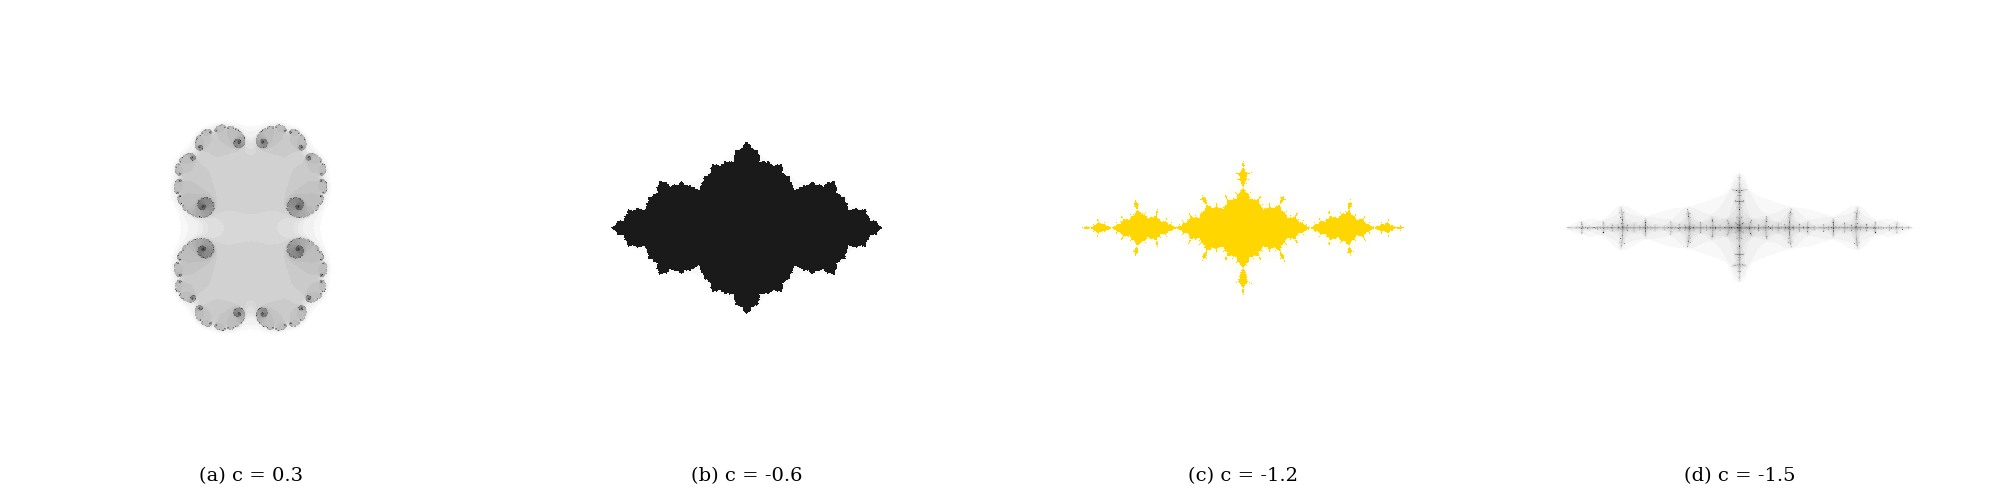

In [5]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

values = [complex(0.3, 0), complex(-0.6, 0), complex(-1.2, 0), complex(-1.5, 0)]
palletes = ['BLACK', 'BLACK', 'GOLD', 'BLACK']
labels = ['a', 'b', 'c', 'd']

for i, (c, ax) in enumerate(zip(values, axes)):
    julia = JuliaSet(c)
    julia.compute()
    julia.visualize(ax=ax, palette=palletes[i])
    julia.save(i+1, palette=palletes[i])
    ax.set_title(getTitle(c, labels[i]), y=-0.1, fontsize=14)

plt.show()
plt.tight_layout()
plt.savefig('archive/juliaSets-01.png', bbox_inches='tight', dpi=300)
plt.show()

### Second Combination: c with only imaginary values (*Re(c) = 0, Im(c) ≠ 0*)

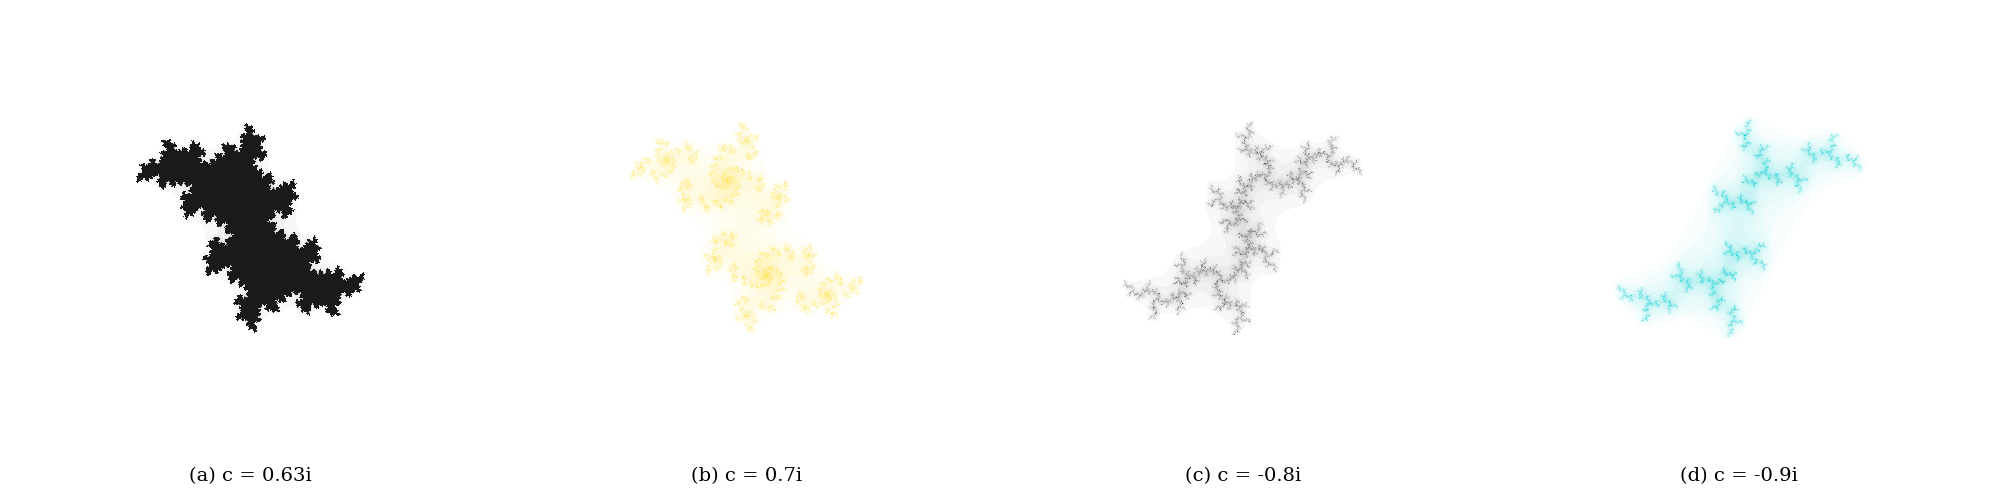

In [6]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

values = [complex(0, 0.63), complex(0, 0.7), complex(0, -0.8), complex(0, -0.9)]
palletes = ['BLACK', 'GOLD', 'BLACK', 'TEAL']
labels = ['a', 'b', 'c', 'd']

for i, (c, ax) in enumerate(zip(values, axes)):
    julia = JuliaSet(c)
    julia.compute()
    julia.visualize(ax=ax, palette=palletes[i])
    julia.save(i+5, palette=palletes[i])
    ax.set_title(getTitle(c, labels[i]), y=-0.1, fontsize=14)

plt.show()
plt.tight_layout()
plt.savefig('archive/juliaSets-02.png', bbox_inches='tight', dpi=300)
plt.show()

### Third Combination: c with both real and imaginary values  (*Re(c) ≠ 0, Im(c) ≠ 0*)

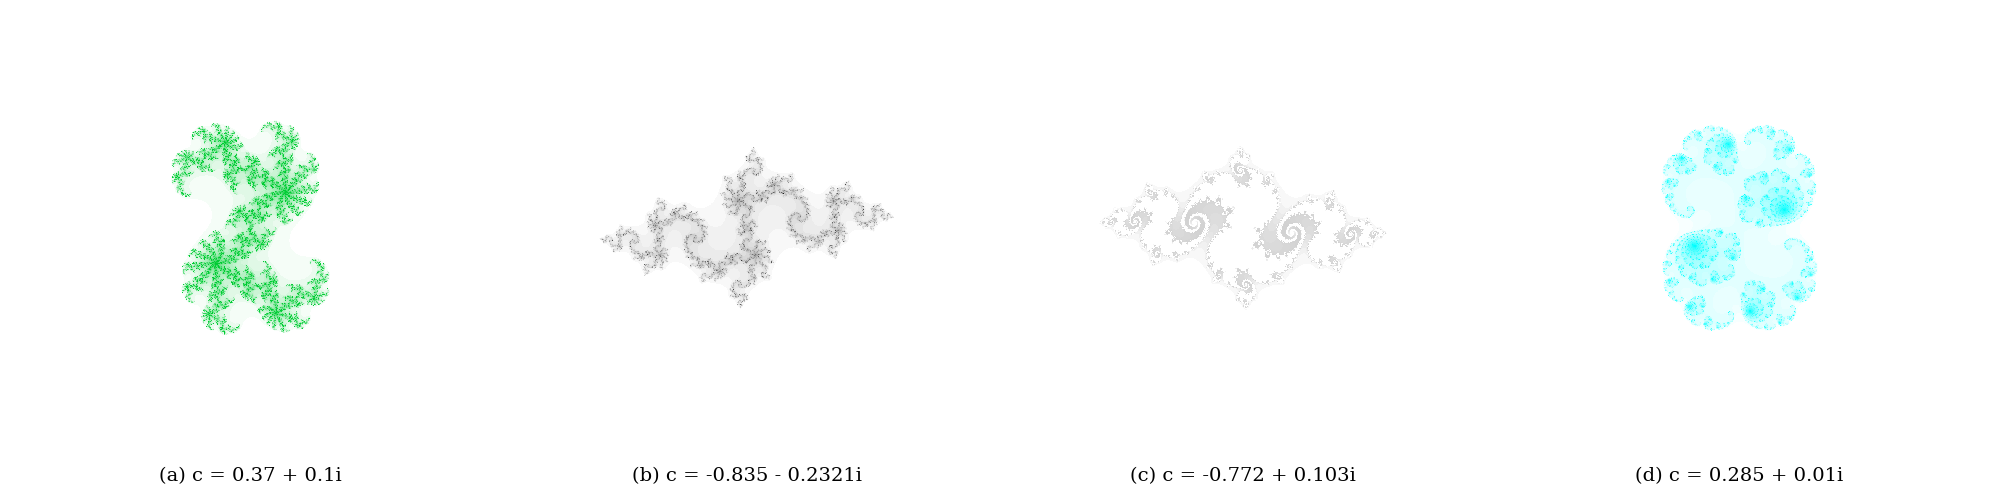

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

values = [complex(0.37, 0.1), complex(-0.835,-0.2321), 
          complex(-0.772, 0.103), complex(0.285, 0.01)]
palletes = ['GREEN', 'BLACK', 'WHITE', 'CYAN']
labels = ['a', 'b', 'c', 'd']

for i, (c, ax) in enumerate(zip(values, axes)):
    julia = JuliaSet(c)
    julia.compute()
    julia.visualize(ax=ax, palette=palletes[i])
    julia.save(i+9, palette=palletes[i])
    ax.set_title(getTitle(c, labels[i]), y=-0.1, fontsize=14)

plt.show()
plt.tight_layout()
plt.savefig('archive/juliaSets-03.png', bbox_inches='tight', dpi=300)
plt.show()

--- 
# ~ Combining Elements ~

## 🔭 Fitting the Images

In [4]:
from PIL import Image

In [9]:
def fitContent(image, padding=10):  # Added padding parameter with default value of 10
    # Convert image to numpy array
    imgArray = np.array(image)
    nonTransparent = np.where(imgArray[:, :, 3] > 0)

    # Calculate bounding box
    minX, maxX = np.min(nonTransparent[1]), np.max(nonTransparent[1])
    minY, maxY = np.min(nonTransparent[0]), np.max(nonTransparent[0])

    # Add padding while ensuring we don't exceed image boundaries
    minX = max(0, minX - padding)
    minY = max(0, minY - padding)
    maxX = min(image.width, maxX + 1 + padding)
    maxY = min(image.height, maxY + 1 + padding)

    # Crop image to padded bounding box
    return image.crop((minX, minY, maxX, maxY))

## 🔬Examples of Combinations

### Code-able Combinations

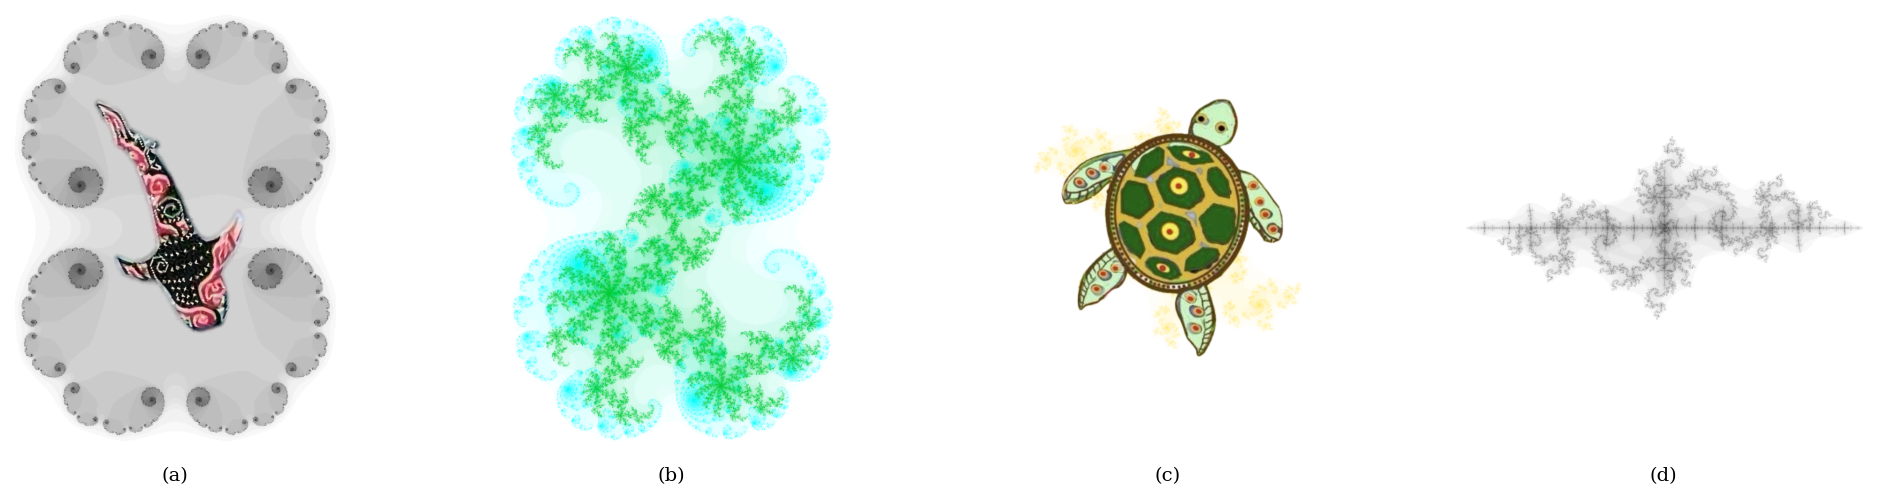

In [19]:
backgrounds = ['juliaSets/julia-01.png', 'juliaSets/julia-12.png', 'juliaSets/julia-06.png', 'juliaSets/julia-04.png']
foregrounds = ['motifs/hiuTaliyasan.png', 'juliaSets/julia-13.png', 'motifs/rutunPenyu.png', 'juliaSets/julia-10.png']
labels = ['a', 'b', 'c', 'd']

# 1 row, 4 columns
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, (bg, fg, ax) in enumerate(zip(backgrounds, foregrounds, axes)):
    background = Image.open(bg)
    foreground = Image.open(fg)
    
    if i == 0 or i == 1:
        background = fitContent(background)
        
    combined = Image.alpha_composite(background, foreground)
    combined.save(f'combinations/combination-{labels[i]}.png')
    ax.imshow(combined)
    ax.axis('off')
    ax.set_title(f'({labels[i]})', y=-0.1, fontsize=20)

plt.tight_layout()
plt.savefig('archive/combination-Coded.png', bbox_inches='tight', dpi=300)
plt.show()

### Manual Combinations

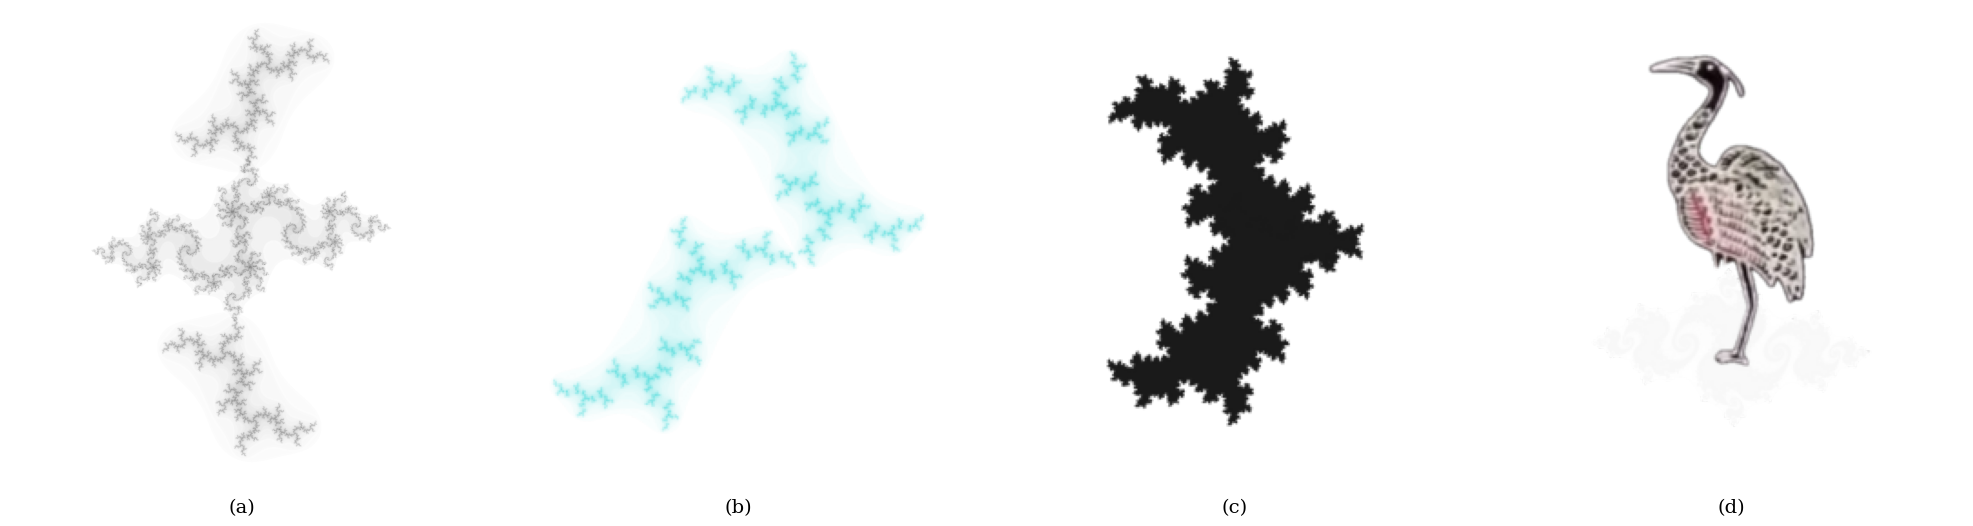

In [20]:
manual = ['combination-05.png', 'combination-06.png', 'combination-07.png', 'combination-08.png']

# 1 row, 4 columns
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, (file, ax) in enumerate(zip(manual, axes)):
    file = 'combinations/' + file
    combined = Image.open(file)
    ax.imshow(combined)
    ax.axis('off')
    ax.set_title(f'({labels[i]})', y=-0.1, fontsize=14)
    
plt.tight_layout()
plt.savefig('archive/combination-Manual.png', bbox_inches='tight', dpi=300)
plt.show()

---
# ~ Generating the Batik Motifs Variations ~

## 🏭 Defining the Generator

In [5]:
# Load images directly by filename
def load_images(filenames):
    images = []
    for filename in filenames:
        img = Image.open(filename).convert('RGBA')  # Ensure transparency support
        images.append(img)
            
    return images

In [6]:
def generateBatikVariations(images, rows, cols, width, height, colors):
    motifWidth = cols * width
    motifHeight = rows * height
    pattern = Image.new('RGBA', (motifWidth, motifHeight), colors)

    for row in range(rows):
        for col in range(cols):
            if (col + 1) % 2 == 1:
                img = images[0] if (row + 1) % 2 == 1 else images[2]
            else:
                img = images[1] if (row + 1) % 2 == 1 else images[3]

            flip = False
            if col % 2 == 1:
                flip = (col // 2) % 2 == 1 
            else: 
                flip = ((col-1) // 2) % 2 == 1

            if flip:
                img = img.transpose(Image.FLIP_LEFT_RIGHT)

            resizedImage = img.resize((width, height))
            pattern.paste(resizedImage, (col * width, row * height), resizedImage)

    return pattern

# # Example usage
# filenames = ['image-01.png', 'image-02.png', 'image-03.png', 'image-04.png']
# rows = 7; cols = 5; width = 256; height = 256

# images = load_images(filenames)

# if len(images) < 4:
#     print("Please provide exactly 4 images.")

# else:
#     pattern = generateBatikVariations(images, rows, cols, width, height, (255, 245, 182, 255))
#     pattern.save('batikVariations/batik-XX.png')

# 1 2 1 2
# 3 4 3 4
# 1 2 1 2
# 3 4 3 4

## 🔍 Visualize the Variations

In [7]:
rows = 7; cols = 5; width = 256; height = 256

### First Variation

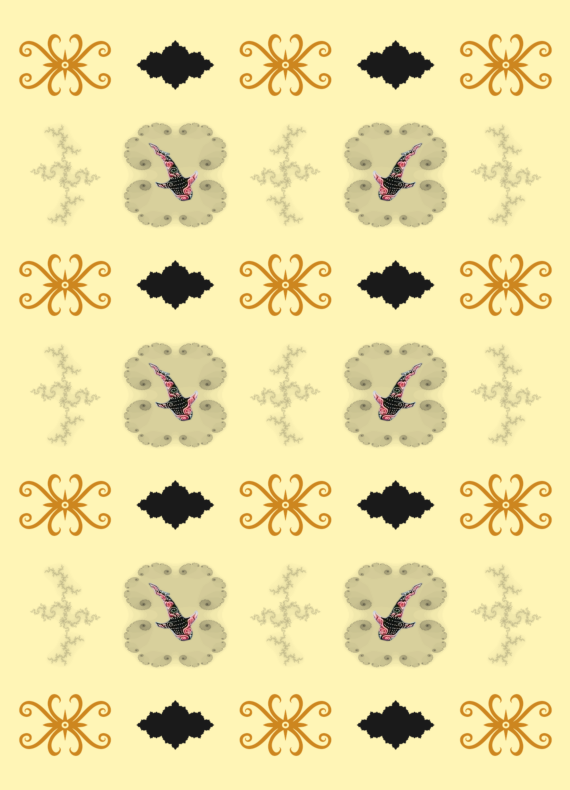

In [8]:
filenames = ['motifs/tengkawangAmpiek-01.png',   'juliaSets/julia-02.png',
             'combinations/combination-05.png', 'combinations/combination-01.png']

images = load_images(filenames)

if len(images) < 4: print("Please provide exactly 4 images.")
else:
    pattern = generateBatikVariations(images, rows, cols, width, height, (255, 245, 182, 255))
    output_path = 'variations/batik-01.png'
    pattern.save(output_path)
    plt.figure(figsize=(10, 10), facecolor='#fff5b6')
    plt.imshow(pattern)
    plt.axis('off')
    plt.show()

### Second Variation

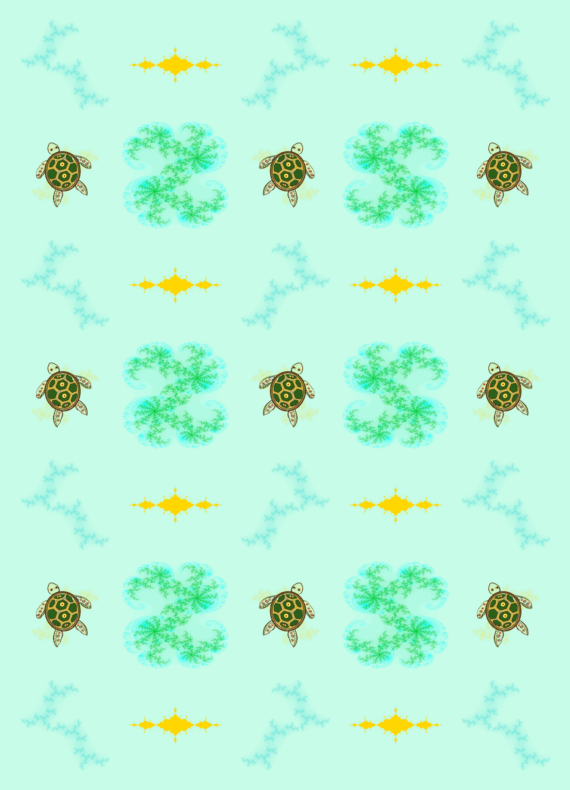

In [9]:
filenames = ['combinations/combination-06.png', 'juliaSets/julia-03.png',
             'combinations/combination-03.png', 'combinations/combination-02.png']

images = load_images(filenames)

if len(images) < 4: print("Please provide exactly 4 images.")
else:
    pattern = generateBatikVariations(images, rows, cols, width, height, (198, 252, 232, 255))
    output_path = 'variations/batik-02.png'
    pattern.save(output_path)
    plt.figure(figsize=(10, 10), facecolor='#c6fce8')
    plt.imshow(pattern)
    plt.axis('off')
    plt.show()

### Third Variation

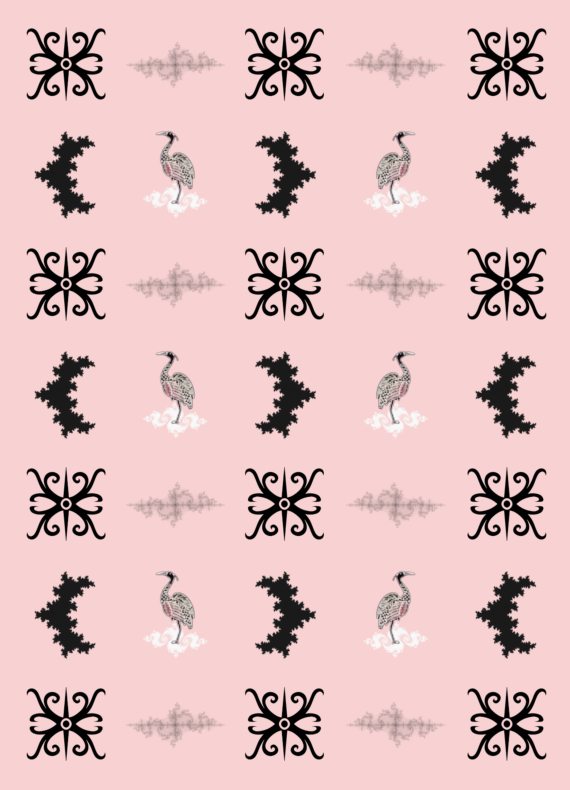

In [10]:
filenames = ['motifs/tengkawangAmpiek-02.png',   'combinations/combination-04.png',
             'combinations/combination-07.png', 'combinations/combination-08.png']

images = load_images(filenames)

if len(images) < 4: print("Please provide exactly 4 images.")
else:
    pattern = generateBatikVariations(images, rows, cols, width, height, (248, 210, 210, 255))
    output_path = 'variations/batik-03.png'
    pattern.save(output_path)
    plt.figure(figsize=(10, 10), facecolor='#f8d2d2')
    plt.imshow(pattern)
    plt.axis('off')
    plt.show()

### All Together

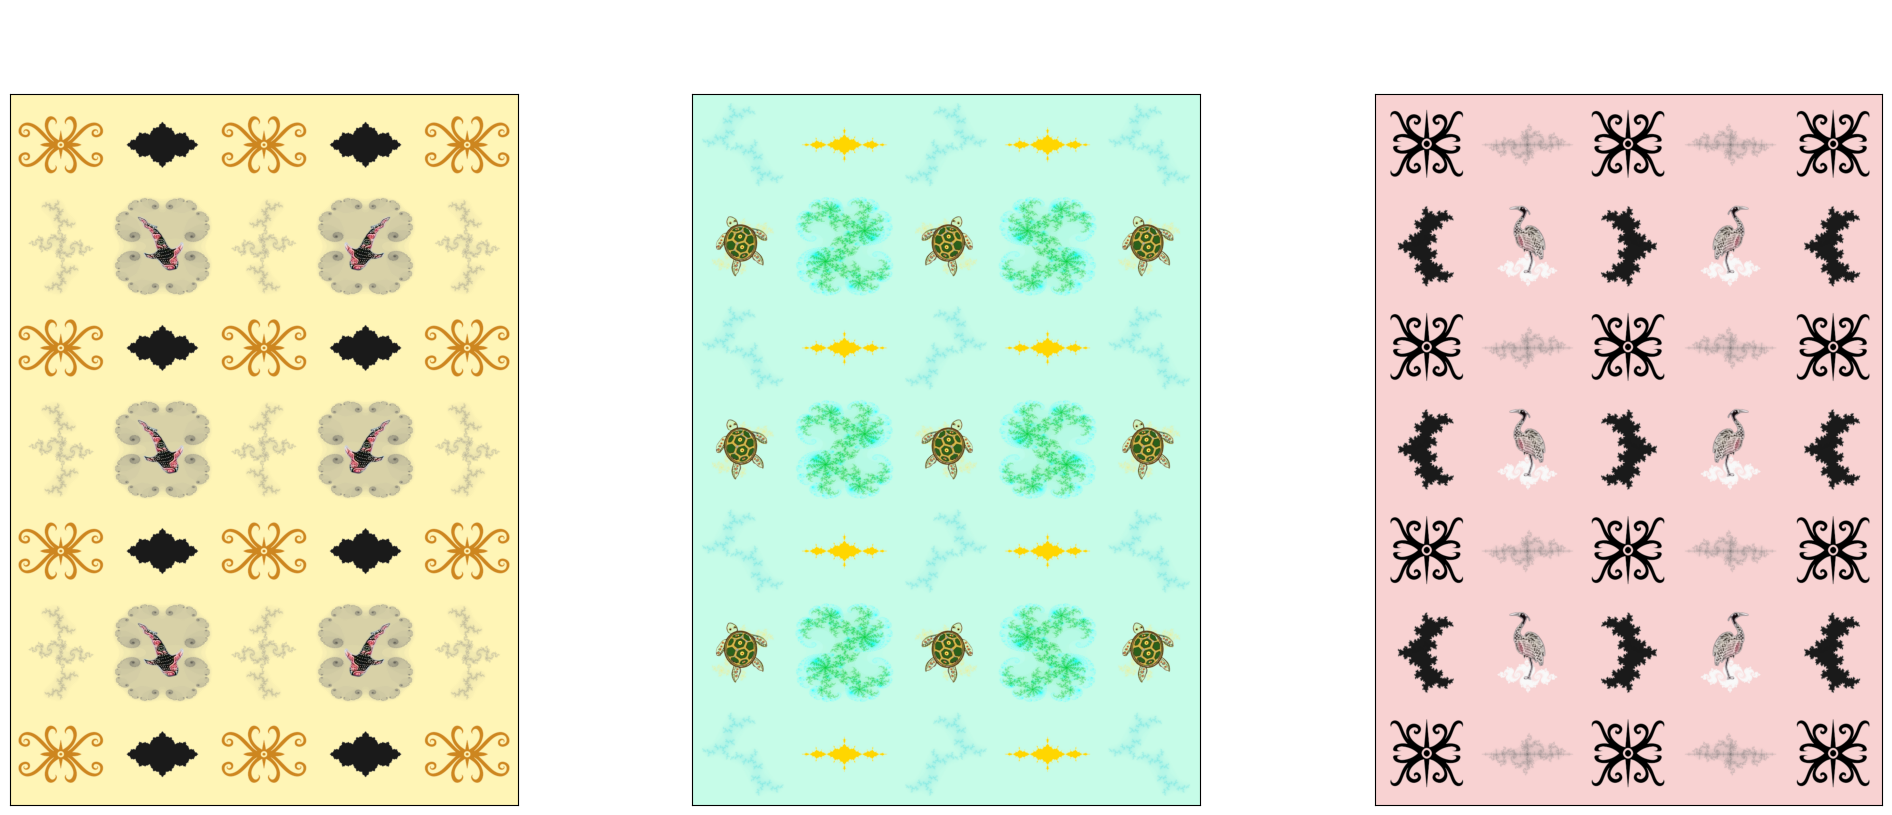

In [ ]:
batiks = ['batik-01.png', 'batik-02.png', 'batik-03.png']

fig, axes = plt.subplots(1, 3, figsize=(21, 8))
fig.suptitle('Variations of East Kalimantan Batik Motifs Using Julia Set', fontsize=20, y=1.02, color='white')

for i, (file, ax) in enumerate(zip(batiks, axes)):
   file = 'variations//' + file
   batik = Image.open(file)
   
   ax.set_frame_on(True)
   ax.imshow(batik)
   
   ax.axis('on')
   ax.set_xticks([]) 
   ax.set_yticks([])  

plt.tight_layout(pad=1.5, w_pad=2.0)
plt.savefig('archive/batikVariations.png', bbox_inches='tight', dpi=300, pad_inches=0.5)0